# Compare results from different ROCKET methods
1. ROCKET
2. miniROCKET
3. multiROCKET

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.classification.kernel_based import RocketClassifier

from datasets import BalancedDataset
from param import *

datalist = ParamDir().data_path_list

data_dir = datalist[2] # a wild-type mouse
dataset = BalancedDataset(data_dir, 1.0, False)

(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

## Multivariate Rocket

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

rocket = RocketClassifier(
    rocket_transform="rocket",
    use_multivariate="yes"
    )
param_grid = {"num_kernels": [2**i for i in range(2, 12)]}
parameter_tuning_method = GridSearchCV(rocket, param_grid, cv=KFold(n_splits=5))
parameter_tuning_method.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RocketClassifier(use_multivariate='yes'),
             param_grid={'num_kernels': [4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                         2048]})

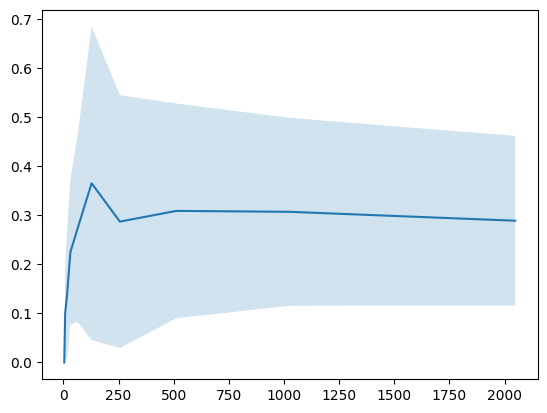

In [7]:
fig, ax = plt.subplots()
results = parameter_tuning_method.cv_results_
xx = [i['num_kernels'] for i in results['params']]
mean_score = results['mean_test_score']
std_score = results['std_test_score']
ax.plot(xx, mean_score)
ax.fill_between(xx, mean_score-std_score, mean_score+std_score, alpha=0.2)

In [8]:
[i['num_kernels'] for i in results['params']]

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [9]:
y_pred = parameter_tuning_method.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)

0.25

## Multivarate miniROCKET

In [10]:
rocket = RocketClassifier(
    rocket_transform="minirocket",
    use_multivariate="yes"
    )
param_grid = {"num_kernels": [2**i for i in range(2, 12)]}
parameter_tuning_method = GridSearchCV(rocket, param_grid, cv=KFold(n_splits=5))
parameter_tuning_method.fit(X_train, y_train)
rocket.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/base.py", line 191, in fit
    self._fit(X, y)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/_delegate.py", line 66, in _fit
    estimator.fit(X=X, y=y)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/base

RocketClassifier(rocket_transform='minirocket', use_multivariate='yes')

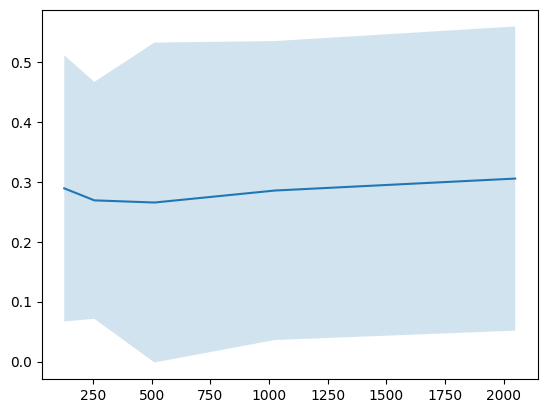

In [11]:
fig, ax = plt.subplots()
results = parameter_tuning_method.cv_results_
xx = [i['num_kernels'] for i in results['params']]
mean_score = results['mean_test_score']
std_score = results['std_test_score']
ax.plot(xx, mean_score)
ax.fill_between(xx, mean_score-std_score, mean_score+std_score, alpha=0.2)

In [12]:
y_pred = parameter_tuning_method.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)

0.375

## Multivarate multiROCKET

In [13]:
rocket = RocketClassifier(
    rocket_transform="multirocket",
    use_multivariate="yes"
    )
param_grid = {"num_kernels": [2**i for i in range(2, 12)]}
parameter_tuning_method = GridSearchCV(rocket, param_grid, cv=KFold(n_splits=5))
parameter_tuning_method.fit(X_train, y_train)
rocket.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/base.py", line 191, in fit
    self._fit(X, y)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/_delegate.py", line 66, in _fit
    estimator.fit(X=X, y=y)
  File "/usr/local/lib/python3.8/site-packages/sktime/classification/base

RocketClassifier(rocket_transform='multirocket', use_multivariate='yes')

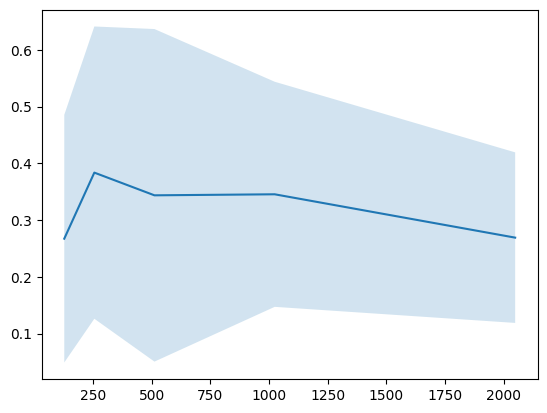

In [14]:
fig, ax = plt.subplots()
results = parameter_tuning_method.cv_results_
xx = [i['num_kernels'] for i in results['params']]
mean_score = results['mean_test_score']
std_score = results['std_test_score']
ax.plot(xx, mean_score)
ax.fill_between(xx, mean_score-std_score, mean_score+std_score, alpha=0.2)

In [15]:
y_pred = parameter_tuning_method.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)

0.25